In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import array
import imageio
from PIL import Image
from collections import namedtuple

In [3]:
binaryFileDataset_byte = namedtuple('dataset', 'dataset_path, suffix')('./dataset/train', '.bytes')
binaryFileDataset_asm = namedtuple('dataset', 'dataset_path, suffix')('./dataset/train', '.asm') 

## 可视化 - 1

In [5]:
example_list = ['01kcPWA9K2BOxQeS5Rju',
                '01IsoiSMh5gxyDYTl4CB',
                '04BfoQRA6XEshiNuI7pF',
                '0qPGt4cRVk9NoiJgubf2',
                '0qjuDC7Rhx9rHkLlItAp',
                '02IOCvYEy8mjiuAQHax3',
                '09LXtWxm1EbK5uVqcQS3',
                '01SuzwMJEIXsK7A8dQbl',
                '01azqd4InC7m9JpocGv5']

dataset_dir = './dataset/train'

In [12]:
def b2m(dataset_dir='./dataset/train', id='', width = 1024, suffix='.bytes', img_dir='./FINAL/figure'):
    file_save_path = os.path.join(dataset_dir, id + suffix).replace("\\", "/")
    f = open(file_save_path, 'rb')
    ln = os.path.getsize(file_save_path)
    rem = ln % width
    a = array.array("B")
    a.fromfile(f, ln - rem)
    f.close()
    height = int(len(a) / width)
    img = np.reshape(a, (height, width))
    img_ = Image.fromarray(img)
    image_save_path = os.path.join(img_dir, id + '_a' + '.png').replace("\\", "/")
    img_.save(image_save_path)
    return img_

In [10]:
def img_deal(img, nbits=128, width=256, height=256, img_dir='./FINAL/figure', id=''):
    initial_img = img
    resized_img = initial_img.resize((width, height))
    resized_img = np.uint8(resized_img)
    mean = np.mean(resized_img)
    std = np.std(resized_img)
    sted_img = (resized_img - mean) / max(std, 1.0 / math.sqrt(width * height))
    reged_img = np.uint8((nbits - 1) * (sted_img - np.min(sted_img)
                                        ) / (np.max(sted_img) - np.min(sted_img)))
    final_img = Image.fromarray(np.uint8(reged_img))
    saved_dir = os.path.join(img_dir, id + '_b' + '.png').replace("\\", "/")
    final_img.save(saved_dir)

In [13]:
for id in example_list:
    img = b2m(id=id)
    img_deal(img, id=id)

In [16]:
def visualize_1(img_dir='./FINAL/figure'):
    plt.figure(figsize=(10, 4))
    font = {'family': 'Times New Roman',
            'weight': 'normal',
            'size': 12,
            }

    for i in range(9):
        id = example_list[i]
        file_path_a = os.path.join(img_dir, id + '_a.png').replace("\\", "/")
        initial_img = Image.open(file_path_a)
        plt.subplot(2, 10, i+1)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.axis('off')
        plt.imshow(initial_img, cmap='gray')
        plt.title(f'Example {i+1}', font)

    for i in range(9):
        id = example_list[i]
        file_path_b = os.path.join(img_dir, str(id) + '_b.png').replace("\\", "/")
        initial_img = Image.open(file_path_b)
        plt.subplot(2, 10, i+11)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.axis('off')
        plt.imshow(initial_img, cmap='gray')
        plt.title(f'Example {i+1}', font)

    plt.tight_layout(pad=0.5)
    plt.show()

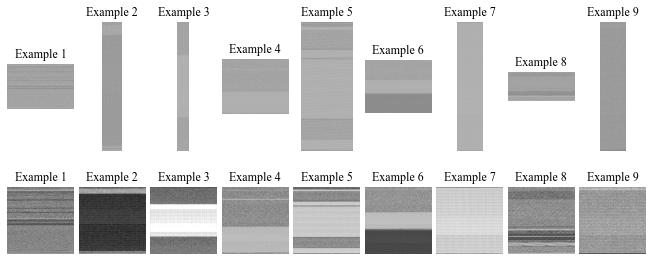

In [17]:
visualize_1()

## 可视化 - 2